<a href="https://colab.research.google.com/github/kbezzy4/stc510/blob/main/Essentials_M3Project_Bell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Importing the needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [40]:
# Pulling in the crime data
data = pd.read_csv('crimedata.csv')

<ipython-input-40-ca743f7b58e7>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('crimedata.csv')


In [41]:
# Making sense of the data by getting info on columns:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524115 entries, 0 to 524114
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   _id                 524115 non-null  int64  
 1   INC NUMBER          524115 non-null  object 
 2   OCCURRED ON         523696 non-null  object 
 3   OCCURRED TO         337814 non-null  object 
 4   UCR CRIME CATEGORY  524115 non-null  object 
 5   100 BLOCK ADDR      524115 non-null  object 
 6   ZIP                 524109 non-null  float64
 7   PREMISE TYPE        520633 non-null  object 
 8   GRID                522682 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 36.0+ MB


In [42]:
# Renaming UCR CRIME CATEGORY column
df.rename(columns={'UCR CRIME CATEGORY': 'UCR_CRIME_CATEGORY'}, inplace=True)

In [43]:
# Getting value counts for UCR
df.UCR_CRIME_CATEGORY.value_counts()

LARCENY-THEFT                            266654
BURGLARY                                  67379
MOTOR VEHICLE THEFT                       60029
DRUG OFFENSE                              47677
AGGRAVATED ASSAULT                        47484
ROBBERY                                   20635
RAPE                                       8075
ARSON                                      4837
MURDER AND NON-NEGLIGENT MANSLAUGHTER      1345
Name: UCR_CRIME_CATEGORY, dtype: int64

<Axes: >

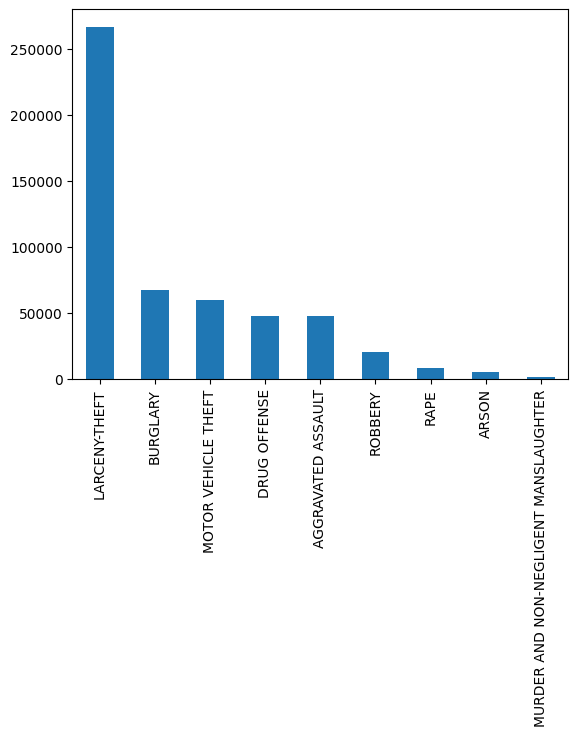

In [44]:
# Bar chart to visualize data above.
df.UCR_CRIME_CATEGORY.value_counts().plot.bar()

In [45]:
# Sort the crime data dataframe by crime category and zip code
df.sort_values(by=['UCR_CRIME_CATEGORY','ZIP'])

,_id,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR_CRIME_CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,GRID
537,538,201500002122070,11/04/2015 08:47,NaN,AGGRAVATED ASSAULT,4XX W MONROE ST,85003.0,NaN,BA27
1879,1880,201500002177147,11/12/2015 15:23,11/12/2015 15:25,AGGRAVATED ASSAULT,S 1ST AVE & W MADISON ST,85003.0,STREET / ROADWAY / ALLEY / SIDEWALK,BA27
5737,5738,201500002325071,12/05/2015 23:15,12/05/2015 23:21,AGGRAVATED ASSAULT,XX N CENTRAL AVE,85003.0,PARKING LOT,BA27
9028,9029,201500002441181,12/24/2015 15:27,NaN,AGGRAVATED ASSAULT,N CENTRAL AVE & W MCDOWELL RD,85003.0,LIGHT RAIL,BD27
9766,9767,201510000020034,12/29/2015 16:55,NaN,AGGRAVATED ASSAULT,2XX W VAN BUREN ST,85003.0,STREET / ROADWAY / ALLEY / SIDEWALK,BB27
...,...,...,...,...,...,...,...,...,...
522795,522796,202400000064129,01/14/2024 01:39,NaN,ROBBERY,29XX S 99TH AVE,85353.0,CONVENIENCE MARKET / STORE,AG05
468157,468158,202300000094663,01/19/2023 16:50,01/19/2023 16:51,ROBBERY,248XX N 72ND AVE,85383.0,STREET / ROADWAY / SIDEWALK,NaN
137904,137905,201700002229242,12/20/2017 09:56,NaN,ROBBERY,58XX W THOMAS RD,85396.0,RETAIL BUSINESS,NaN
156946,156947,201800000608354,04/07/2018 02:00,04/07/2018 02:15,ROBBERY,30XX W THOMAS RD,85396.0,PARKING LOT,NaN


In [46]:
# Bringing in the cost of living data for analysis
data2 = pd.read_csv('cost_of_living_us.csv')

In [47]:
# Getting initial information about the cost of living data, df2
df2 = pd.DataFrame(data2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            31430 non-null  float64
 7   food_cost               31430 non-null  float64
 8   transportation_cost     31430 non-null  float64
 9   healthcare_cost         31430 non-null  float64
 10  other_necessities_cost  31430 non-null  float64
 11  childcare_cost          31430 non-null  float64
 12  taxes                   31430 non-null  float64
 13  total_cost              31430 non-null  float64
 14  median_family_income    31420 non-null

In [48]:
# Seeing how dataframe is set
df2.head(15)

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
5,1,AL,True,"Montgomery, AL MSA",Autauga County,2p0c,10180.29420,6334.01436,12861.88680,11474.95968,5983.78524,0.0000,8236.73076,55071.6684,73010.414062
6,1,AL,True,"Montgomery, AL MSA",Autauga County,2p1c,12067.50240,7883.31888,13589.11200,14397.03720,7228.96944,6147.8298,9459.90240,70773.6744,73010.414062
7,1,AL,True,"Montgomery, AL MSA",Autauga County,2p2c,12067.50240,9984.05268,14723.60760,17319.11280,7990.14840,15824.6940,11168.75028,89077.8696,73010.414062
8,1,AL,True,"Montgomery, AL MSA",Autauga County,2p3c,15257.15040,12189.77040,14994.60000,20241.18720,9945.10176,18802.1892,13210.14840,104640.1524,73010.414062
9,1,AL,True,"Montgomery, AL MSA",Autauga County,2p4c,15257.15040,14917.35840,15064.26360,23163.26520,10933.41504,18802.1892,13417.21920,111554.8596,73010.414062


In [49]:
df2.describe()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997017
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970245
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976562
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988281
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605469
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070312
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468750


In [50]:
# Creating a filter to just show AZ
df2_az = df2[df2.state=='AZ']
df2_az

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
960,97,AZ,False,"Apache County, AZ",Apache County,1p0c,6408.0,3340.79040,11980.68096,6741.27984,3532.37112,0.00000,5442.29700,37445.4204,42365.816406
961,97,AZ,False,"Apache County, AZ",Apache County,1p1c,9420.0,4923.51312,12685.89360,10116.50100,5197.22016,5926.10484,5645.01960,53914.2540,42365.816406
962,97,AZ,False,"Apache County, AZ",Apache County,1p2c,9420.0,7213.76952,13438.60560,13491.72360,6027.07068,12113.67720,6288.08208,67992.9312,42365.816406
963,97,AZ,False,"Apache County, AZ",Apache County,1p3c,12300.0,9623.48652,13928.11800,16866.94440,7943.74440,14017.54560,8208.21096,82888.0488,42365.816406
964,97,AZ,False,"Apache County, AZ",Apache County,1p4c,12300.0,11779.79880,14152.00440,20242.16640,8725.06056,14017.54560,8328.22632,89544.8028,42365.816406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,111,AZ,True,"Yuma, AZ MSA",Yuma County,2p0c,8460.0,5173.72956,12613.31520,13480.76040,4940.03796,0.00000,6468.10548,51135.9492,51688.371094
1106,111,AZ,True,"Yuma, AZ MSA",Yuma County,2p1c,11124.0,6439.22676,13547.26560,16847.55960,6363.85032,8299.38864,8009.26536,70630.5588,51688.371094
1107,111,AZ,True,"Yuma, AZ MSA",Yuma County,2p2c,11124.0,8155.14252,14254.01040,20214.35760,6985.59372,15970.26360,8670.21900,85373.5896,51688.371094
1108,111,AZ,True,"Yuma, AZ MSA",Yuma County,2p3c,15852.0,9956.80884,15363.13320,23581.15560,9351.54936,18330.53160,10922.82792,103358.0040,51688.371094


In [79]:
# Looking at total cost throughout AZ and seeing if there is any relation to ZIP code of crimes.
x = df2_az.loc[:,'total_cost']
y = df.loc[:149,'ZIP']

<function matplotlib.pyplot.show(close=None, block=None)>

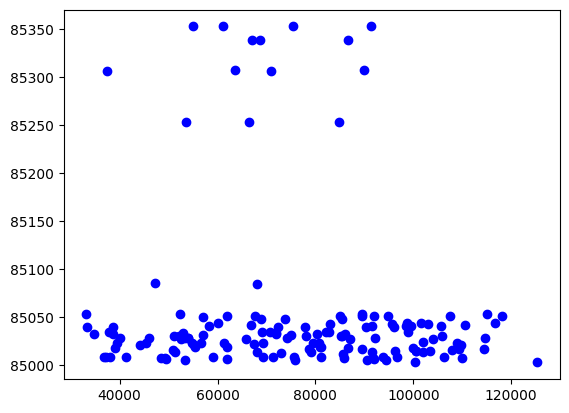

In [80]:
plt.scatter(x,y,c='blue')
plt.show



---
Some clustering of crimes in higher cost of living
